In [2]:
from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 16
plt.rcParams["figure.autolayout"] = True

In [4]:
category = pd.read_csv("Hyper/categories - categories.csv",index_col = "Unnamed: 0")

In [5]:
category.head()

,id,categories
1,704.0001,hep-ph
2,704.0002,math.CO cs.CG
3,704.0003,physics.gen-ph
4,704.0004,math.CO
5,704.0005,math.CA math.FA


In [6]:
tags = category["categories"].apply(lambda x: x.split())

tags[:5]

1              [hep-ph]
2      [math.CO, cs.CG]
3      [physics.gen-ph]
4             [math.CO]
5    [math.CA, math.FA]
Name: categories, dtype: object

# Matrice incidence

In [7]:
#

tags_u = [item for sublist in tags for item in sublist]

tags_u = list(set(tags_u))

Nt =len(tags_u)


Mt = np.zeros((category.shape[0],Nt))  #matrix(0, nrow(df), Nt)

for i in range(Nt):
    
    Mt[:,i] = category["categories"].str.contains(tags_u[i]).astype(int)


In [8]:
Mt[1:10,1:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
from scipy import sparse

Mt_sparse = sparse.csc_array(Mt)

In [10]:
print(Mt_sparse)

  (33, 0)	1.0
  (428, 0)	1.0
  (1389, 0)	1.0
  (2131, 0)	1.0
  (3137, 0)	1.0
  (4229, 0)	1.0
  (5059, 0)	1.0
  (5447, 0)	1.0
  (8637, 0)	1.0
  (10254, 0)	1.0
  (10594, 0)	1.0
  (11666, 0)	1.0
  (12289, 0)	1.0
  (12379, 0)	1.0
  (12444, 0)	1.0
  (14248, 0)	1.0
  (14305, 0)	1.0
  (14477, 0)	1.0
  (15721, 0)	1.0
  (15743, 0)	1.0
  (16886, 0)	1.0
  (17414, 0)	1.0
  (17488, 0)	1.0
  (17667, 0)	1.0
  (17671, 0)	1.0
  :	:
  (1083501, 174)	1.0
  (1083612, 174)	1.0
  (1083939, 174)	1.0
  (1084734, 174)	1.0
  (1084782, 174)	1.0
  (1085299, 174)	1.0
  (1085503, 174)	1.0
  (1085725, 174)	1.0
  (1085787, 174)	1.0
  (1086251, 174)	1.0
  (1086692, 174)	1.0
  (1086911, 174)	1.0
  (1087055, 174)	1.0
  (1087255, 174)	1.0
  (1087313, 174)	1.0
  (1087970, 174)	1.0
  (1088233, 174)	1.0
  (1088791, 174)	1.0
  (1088876, 174)	1.0
  (1089188, 174)	1.0
  (1090501, 174)	1.0
  (1090948, 174)	1.0
  (1091255, 174)	1.0
  (1092236, 174)	1.0
  (1254606, 174)	1.0


# Co-occurance matrix

In [11]:
M_co = Mt_sparse.transpose().dot(Mt_sparse)

N_art = list(M_co.diagonal())

In [12]:
M_co = M_co.todense()
for i in range(Nt):
    M_co[i,i]=0

<AxesSubplot: >

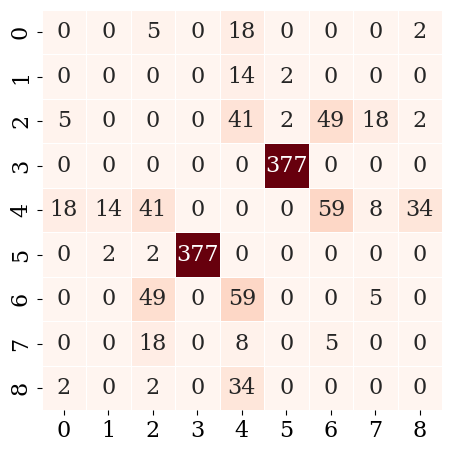

In [13]:
import seaborn as sns
M_co_small = M_co[1:10,1:10]
sns.heatmap(M_co_small, cmap='Reds', annot=True, fmt='g', cbar=False, 
            linewidths=.5, square=True, xticklabels=True, yticklabels=True)

<AxesSubplot: >

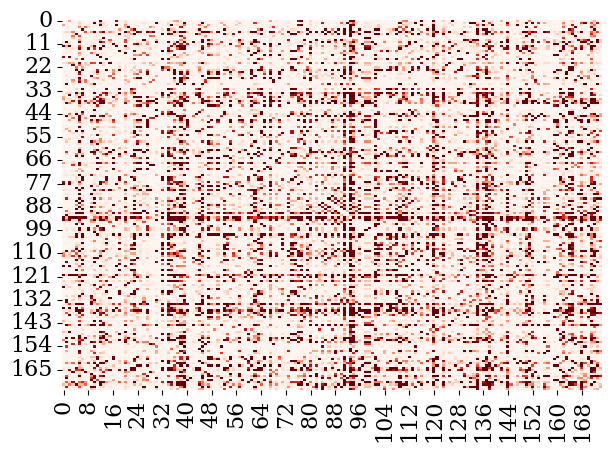

In [29]:
import matplotlib

sns.heatmap(M_co, cmap='Reds', #annot=True, 
            fmt='g', cbar=False, 
            #linewidths=.5, square=True, xticklabels=True, yticklabels=True,
            vmin=0, vmax=100, 
           # norm=matplotlib.colors.BoundaryNorm(np.linspace(0,100,101),256)
           )


In [15]:
from scipy.stats import hypergeom

N_universe = Mt.shape[0]
M_hyper = np.zeros((Nt, Nt))

for i in range(Nt):
    nA = N_art[i]
    for j in range(i+1, Nt):
        nB = N_art[j]
        k = M_co[i,j]
        p = hypergeom.sf(k, N_universe, nA, nB) + hypergeom.pmf(k, N_universe, nA, nB)
        M_hyper[i,j] = p
        M_hyper[j,i] = p


In [30]:
M_hyper[1:10,1:10]

array([[9.09653904e-319, 1.00000000e+000, 7.63598193e-001,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 9.09653904e-319, 1.00000000e+000,
        1.00000000e+000, 9.99999996e-001, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [7.63598193e-001, 1.00000000e+000, 9.09653904e-319,
        1.00000000e+000, 1.12326017e-003, 1.00000000e+000,
        1.38971773e-061, 1.57439793e-019, 9.99784279e-001],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        9.09653904e-319, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000],
       [1.00000000e+000, 9.99999996e-001, 1.12326017e-003,
        1.00000000e+000, 9.09653904e-319, 1.00000000e+000,
        2.50598662e-021, 5.48350788e-001, 1.00000000e+000],
       [1.00000000e+000, 1.00000000e+000, 1.00000000e+000,
        1.00000000e+000, 1.00000000e+000, 9.0965390

In [17]:
min(x for x in list(M_hyper.flatten()) if x > 0)

9.09654e-319

In [18]:
M_hyper[np.array(M_hyper) == 0] = min(x for x in list(M_hyper.flatten()) if x > 0)

In [19]:
M_hyper_log = -np.log10(M_hyper)

M_hyper_log[np.array(M_hyper_log) < 0] = 0

np.savetxt("Hyper/M_hyper.csv", M_hyper, delimiter=",")

In [20]:
nodes_df = pd.DataFrame(tags_u,columns=['label'])
nodes_df.head()

,label
0,q-bio.CB
1,cs.IR
2,q-bio.BM
3,q-fin.GN
4,cond-mat.supr-con


In [21]:
nodes_df.to_csv('Hyper/M_nodes.csv')

In [22]:
co_edges_df = pd.DataFrame(M_co,columns = tags_u, index=tags_u)

In [23]:
co_edges_df.to_csv('Hyper/co_edges_df.csv')

In [24]:
co_edges_df.head()

,q-bio.CB,cs.IR,q-bio.BM,q-fin.GN,cond-mat.supr-con,math.OC,nucl-th,q-fin.TR,econ.EM,cs.LO,...,physics.comp-ph,q-fin.ST,cs.FL,cs.IT,cs.CL,math.CT,physics.data-an,cond-mat.dis-nn,cs.CR,cs.ET
q-bio.CB,0.0,0.0,33.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,...,16.0,0.0,0.0,2.0,0.0,0.0,3.0,28.0,1.0,3.0
cs.IR,0.0,0.0,0.0,5.0,0.0,18.0,0.0,0.0,0.0,2.0,...,6.0,3.0,1.0,58.0,1172.0,2.0,57.0,8.0,80.0,2.0
q-bio.BM,33.0,0.0,0.0,0.0,0.0,14.0,2.0,0.0,0.0,0.0,...,84.0,0.0,6.0,10.0,0.0,1.0,20.0,48.0,0.0,6.0
q-fin.GN,0.0,5.0,0.0,0.0,0.0,41.0,2.0,49.0,18.0,2.0,...,9.0,122.0,0.0,3.0,3.0,0.0,90.0,22.0,6.0,0.0
cond-mat.supr-con,0.0,0.0,0.0,0.0,0.0,0.0,377.0,0.0,0.0,0.0,...,68.0,0.0,0.0,1.0,0.0,0.0,10.0,524.0,1.0,3.0


In [25]:
hyper_edges_df = pd.DataFrame(M_hyper_log,columns = tags_u, index=tags_u)

hyper_edges_df.head()

,q-bio.CB,cs.IR,q-bio.BM,q-fin.GN,cond-mat.supr-con,math.OC,nucl-th,q-fin.TR,econ.EM,cs.LO,...,physics.comp-ph,q-fin.ST,cs.FL,cs.IT,cs.CL,math.CT,physics.data-an,cond-mat.dis-nn,cs.CR,cs.ET
q-bio.CB,318.041124,-0.000000,20.700768,-0.000000,-0.000000,2.889789e-05,-0.0,0.000000,3.810482e-11,5.411220e-05,...,1.037843e+00,-0.000000,-0.000000,1.050505e-11,-0.000000,-0.000000e+00,0.017119,2.089468,0.000016,7.633177e-01
cs.IR,-0.000000,318.041124,-0.000000,0.117135,-0.000000,5.255585e-15,-0.0,-0.000000,-0.000000e+00,1.966264e-13,...,3.645929e-12,0.008363,0.000047,2.041285e-06,318.041124,2.239133e-07,8.509811,-0.000000,9.786374,1.699131e-02
q-bio.BM,20.700768,-0.000000,318.041124,-0.000000,-0.000000,1.676403e-09,-0.0,-0.000000,-0.000000e+00,-0.000000e+00,...,1.922139e+01,-0.000000,0.251176,-0.000000e+00,-0.000000,4.313869e-06,0.797851,0.948332,-0.000000,9.109451e-01
q-fin.GN,-0.000000,0.117135,-0.000000,318.041124,-0.000000,2.949520e+00,-0.0,60.857073,1.880289e+01,9.369633e-05,...,3.782020e-02,156.849042,-0.000000,5.636976e-13,0.000024,-0.000000e+00,61.100701,0.390767,0.006893,-0.000000e+00
cond-mat.supr-con,-0.000000,-0.000000,-0.000000,-0.000000,318.041124,-0.000000e+00,-0.0,-0.000000,-0.000000e+00,-0.000000e+00,...,-0.000000e+00,-0.000000,-0.000000,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000,12.773864,-0.000000,2.929530e-12


In [31]:
hyper_edges_df.shape

(175, 175)

In [26]:
hyper_edges_df.to_csv('Hyper/hyper_edges_df.csv')